<a href="https://colab.research.google.com/github/OczyDimon/ML_2025_autumn/blob/main/homework-02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

img = Image.open('panda.jpg')

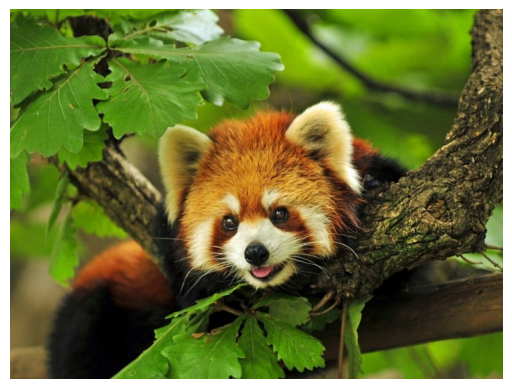

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
x = np.array(img, dtype=np.float32)

In [ ]:
x.shape

(525, 700, 3)

In [ ]:
img1, img2, img3 = np.split(x, 3, axis=2)

In [ ]:
img1, img2, img3 = img1.reshape((525, 700)), img2.reshape((525, 700)), img3.reshape((525, 700))

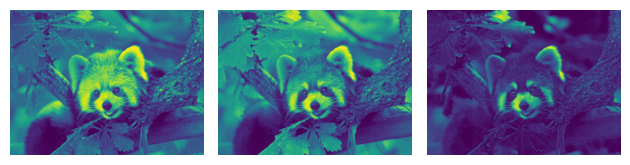

In [ ]:
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img1)
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(img2)
plt.subplot(1, 3, 3)
plt.imshow(img3)
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
U1, S1, V1 = np.linalg.svd(img1, full_matrices=False)
U2, S2, V2 = np.linalg.svd(img2, full_matrices=False)
U3, S3, V3 = np.linalg.svd(img3, full_matrices=False)

In [ ]:
U1.shape, S1.shape, V1.shape

((525, 525), (525,), (525, 700))

In [ ]:
r = 100

In [ ]:
U1[:,:r].shape, S1[:r].shape, V1[:r,].shape, (U1[:,:r] * S1[:r]).reshape((525,r)).shape

((525, 100), (100,), (100, 700), (525, 100))

In [ ]:
Y1 = (U1[:,:r].reshape((525,r)) * S1[:r]).reshape((525,r)) @ V1[:r,]
Y2 = (U2[:,:r].reshape((525,r)) * S2[:r]).reshape((525,r)) @ V2[:r,]
Y3 = (U3[:,:r].reshape((525,r)) * S3[:r]).reshape((525,r)) @ V3[:r,]

In [ ]:
Y = np.stack((Y1, Y2, Y3), axis=-1)

In [ ]:
Y = np.round(np.clip(Y, a_min=0, a_max=255)).astype(np.uint8)

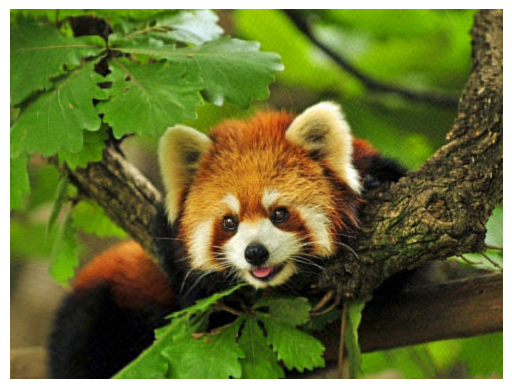

In [ ]:
plt.imshow(Y)
plt.axis('off')
plt.show()

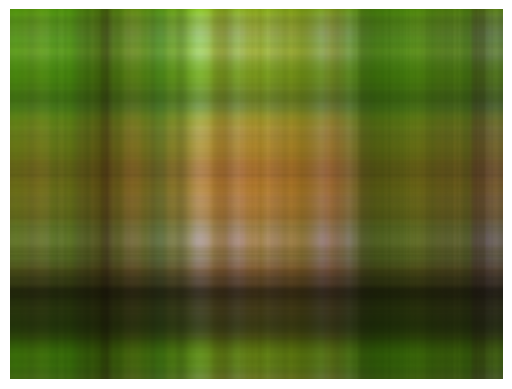

In [ ]:
r = 1
Y1 = (U1[:,:r].reshape((525,r)) * S1[:r]).reshape((525,r)) @ V1[:r,]
Y2 = (U2[:,:r].reshape((525,r)) * S2[:r]).reshape((525,r)) @ V2[:r,]
Y3 = (U3[:,:r].reshape((525,r)) * S3[:r]).reshape((525,r)) @ V3[:r,]
Y = np.stack((Y1, Y2, Y3), axis=-1)
Y = np.round(np.clip(Y, a_min=0, a_max=255)).astype(np.uint8)
plt.imshow(Y)
plt.axis('off')
plt.show()

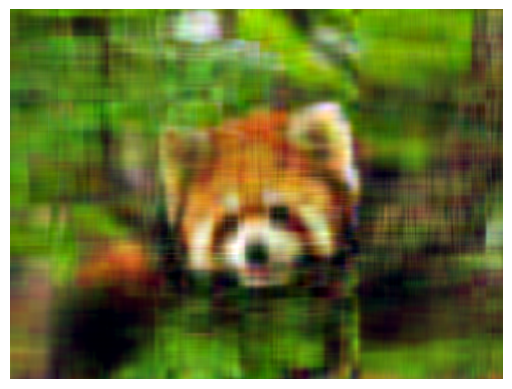

In [ ]:
r = 10
Y1 = (U1[:,:r].reshape((525,r)) * S1[:r]).reshape((525,r)) @ V1[:r,]
Y2 = (U2[:,:r].reshape((525,r)) * S2[:r]).reshape((525,r)) @ V2[:r,]
Y3 = (U3[:,:r].reshape((525,r)) * S3[:r]).reshape((525,r)) @ V3[:r,]
Y = np.stack((Y1, Y2, Y3), axis=-1)
Y = np.round(np.clip(Y, a_min=0, a_max=255)).astype(np.uint8)
plt.imshow(Y)
plt.axis('off')
plt.show()

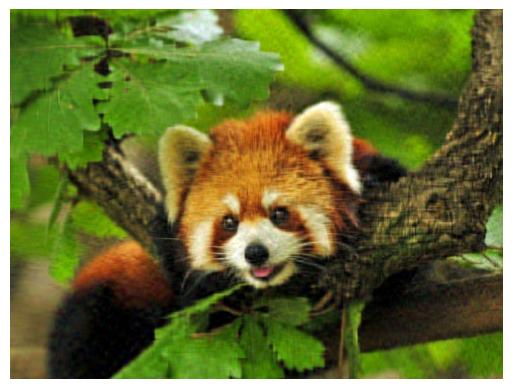

In [ ]:
r = 50
Y1 = (U1[:,:r].reshape((525,r)) * S1[:r]).reshape((525,r)) @ V1[:r,]
Y2 = (U2[:,:r].reshape((525,r)) * S2[:r]).reshape((525,r)) @ V2[:r,]
Y3 = (U3[:,:r].reshape((525,r)) * S3[:r]).reshape((525,r)) @ V3[:r,]
Y = np.stack((Y1, Y2, Y3), axis=-1)
Y = np.round(np.clip(Y, a_min=0, a_max=255)).astype(np.uint8)
plt.imshow(Y)
plt.axis('off')
plt.show()

In [ ]:
M = 200
sigma1 = 0.1
sigma2 = 0.5
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)

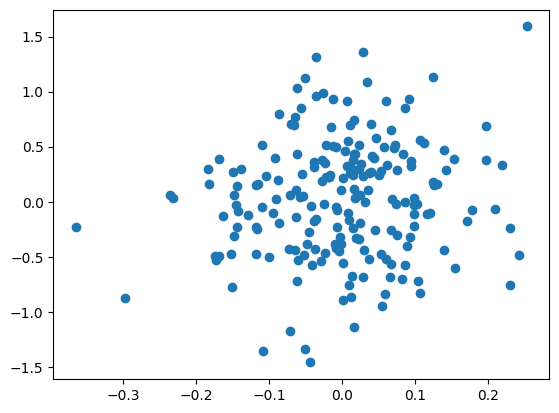

In [ ]:
plt.scatter(x1, x2)
plt.show()

In [ ]:
A = lambda alpha: np.array([[np.cos(alpha), - np.sin(alpha)], [np.sin(alpha), np.cos(alpha)]])

In [ ]:
new_X = (A(np.pi / 2) @ X.T).T

In [ ]:
new_X[:,0].shape

(200,)

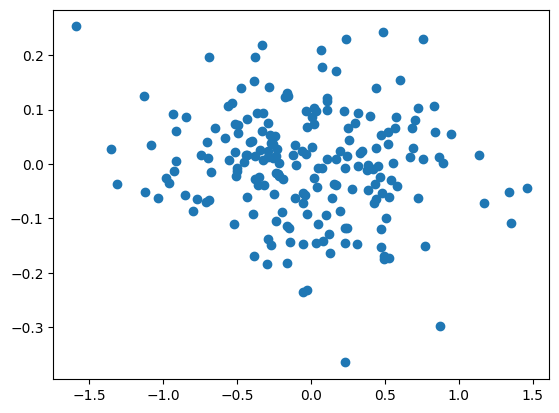

In [ ]:
plt.scatter(new_X[:,0], new_X[:,1])
plt.show()

In [ ]:
C = np.cov(X.T)
C

array([[0.00996933, 0.00651027],
       [0.00651027, 0.28823217]])

In [ ]:
new_C = np.cov(new_X.T)
new_C

array([[ 0.28823217, -0.00651027],
       [-0.00651027,  0.00996933]])

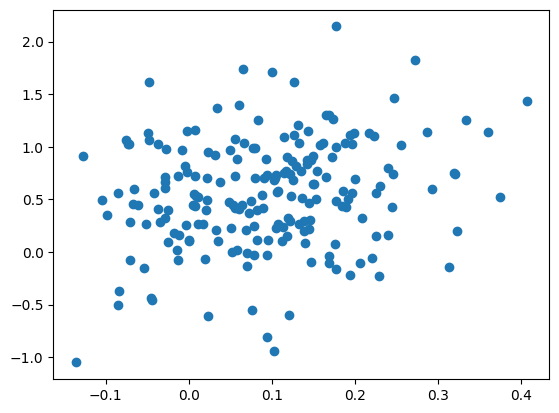

In [ ]:
mean = [0.1, 0.5]
x, y = np.random.multivariate_normal(mean, C, 200).T
plt.scatter(x, y)
plt.show()

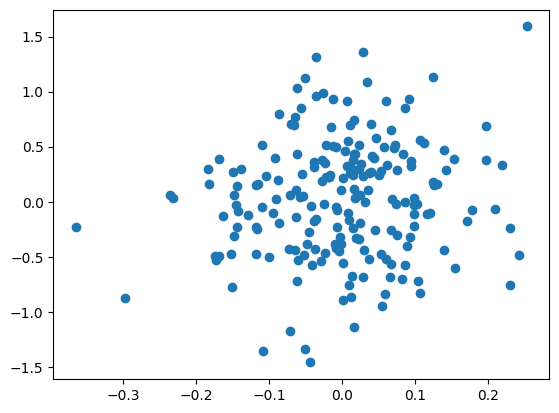

In [ ]:
plt.scatter(x1, x2)
plt.show()

In [ ]:
from scipy.stats import multivariate_normal

In [ ]:
M = 200
sigma1 = 0.1
sigma2 = 0.5
x = np.random.randn(M, 1) * sigma2
y = np.random.randn(M, 1) * sigma1
X = np.concatenate((x, y), axis=1)

In [ ]:
mean = [np.mean(x), np.mean(y)]
mean

[np.float64(-0.030895228489147927), np.float64(-0.003047859769468295)]

In [ ]:
C = np.cov(X.T)
C

array([[0.26671755, 0.00316709],
       [0.00316709, 0.01080896]])

<a list of 3 text.Text objects>

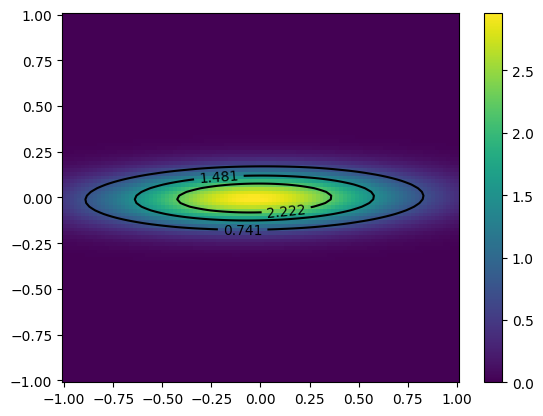

In [ ]:
xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)
m = multivariate_normal(mean=mean, cov=C)
ZZ = m.pdf(pp).reshape(XX.shape)

IMG = plt.pcolor(XX, YY, ZZ)
plt.colorbar(IMG)

CS = plt.contour(XX, YY, m.pdf(pp).reshape(XX.shape), levels=np.linspace(0, np.max(ZZ), 5), colors='k')
plt.clabel(CS, inline=1, fontsize=10)

In [ ]:
x1 = np.random.randn(50, 1)
y1 = np.random.randn(50, 1)
x2 = np.random.randn(150, 1)
y2 = np.random.randn(150, 1)


In [ ]:
mean1 = [np.mean(x1), np.mean(y1)]
mean2 = [np.mean(x2), np.mean(y2)]
mean1, mean2

([np.float64(0.1385196582625913), np.float64(0.2832411827933178)],
 [np.float64(0.1334832334338569), np.float64(-0.022037846353062173)])

In [ ]:
C1 = np.cov(np.concatenate((x1, y1), axis=1).T)
C2 = np.cov(np.concatenate((x2, y2), axis=1).T)
C1, C2

(array([[0.64699715, 0.04563923],
        [0.04563923, 0.71651539]]),
 array([[ 1.20545398, -0.09026667],
        [-0.09026667,  1.06946496]]))

In [ ]:
py1 = 50 / 200
py2 = 150 / 200

In [ ]:
Y = [(0 if i < 50 else 1) for i in range(200)]

In [ ]:
pyx = lambda x, x_mean: (x[0] - x_mean)**2 + (x[1] - x_mean)**2

In [ ]:
x_new = np.random.randn(2, 1)

In [ ]:
x_new

array([[-0.25470802],
       [-2.84148426]])

In [ ]:
compare = lambda x_new: 0 if ((pyx(x_new, py1) * py1) >= (pyx(x_new, py2) * py2)) else 1

In [ ]:
X1 = np.concatenate([x1, x2])
X2 = np.concatenate([y1, y2])

In [ ]:
py1

0.25

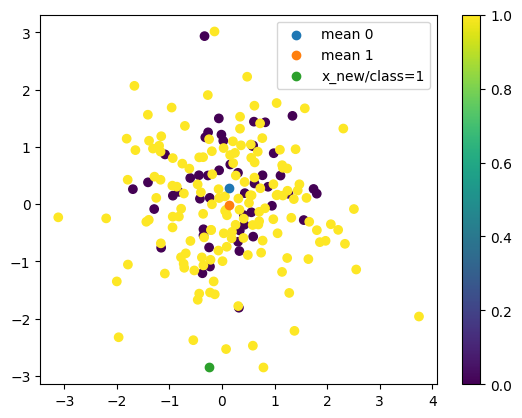

In [ ]:
scatter = plt.scatter(X1, X2, c=Y)
plt.scatter(mean1[0], mean1[1], label='mean 0')
plt.scatter(mean2[0], mean2[1], label='mean 1')
plt.scatter(x_new[0][0], x_new[1][0], label=f'x_new/class={compare(x_new)}')
plt.colorbar(scatter)
plt.legend()
plt.show()

<a list of 4 text.Text objects>

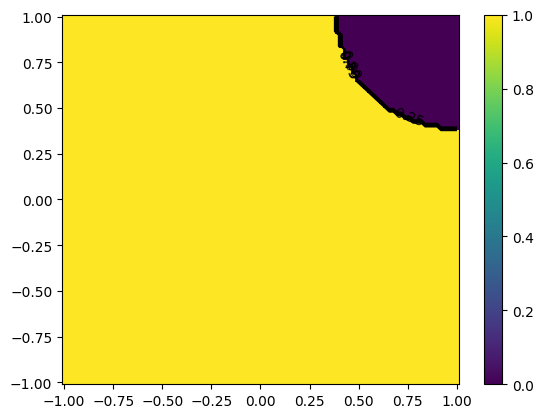

In [ ]:
xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)
m = multivariate_normal(mean=mean, cov=C)
ZZ = np.array([compare(i) for i in pp]).reshape(XX.shape)

IMG = plt.pcolor(XX, YY, ZZ)
plt.colorbar(IMG)

CS = plt.contour(XX, YY, ZZ, levels=np.linspace(np.min(ZZ), np.max(ZZ), 5), colors='k')
plt.clabel(CS, inline=1, fontsize=10)

In [ ]:
from sklearn.base import BaseEstimator

class myLDA(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
        pass

    def predict(self, X):
        pass